In [568]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import style
import graphviz
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [569]:
from google.colab import files
uploaded = files.upload()

Saving Water_Potability.xlsx to Water_Potability (5).xlsx


In [570]:
import io 
df2 = pd.read_excel(io.BytesIO(uploaded['Water_Potability.xlsx']))
df = pd.read_excel("Water_Potability.xlsx")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [571]:
df.shape # show có bao nhiêu dòng dữ liệu và thuộc tính

(3276, 10)

In [572]:
df.isnull().sum() #show dòng dữ liệu trống

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

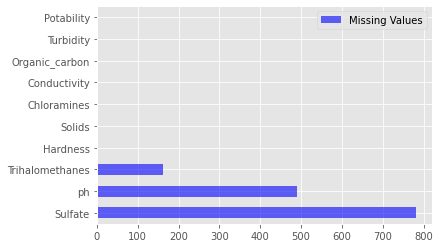

In [573]:
#show biểu đồ dữ liệu trống
style.use('ggplot')
df.isnull().sum().sort_values(ascending=False).plot(kind='barh',color='blue',label='Missing Values',alpha=0.6)
plt.legend()

In [574]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [575]:
df.describe() 
# mô tả thông tin. Thống kê dữ liệu trong pandas
# mean = trung bình
# std = độ lệch chuẩn 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [576]:
pH_nan_1 = df.query('Potability == 1')['ph'][df['ph'].isna()].index

df.loc[pH_nan_1,'ph'] =df.query('Potability == 1')['ph'][df['ph'].notna()].mean()

pH_nan_0 = df.query('Potability == 0')['ph'][df['ph'].isna()].index
df.loc[pH_nan_0,'ph'] = df.query('Potability == 0')['ph'][df['ph'].notna()].mean()

In [577]:
Sulfate_nan_1 = df.query('Potability == 1')['Sulfate'][df['Sulfate'].isna()].index
df.loc[Sulfate_nan_1,'Sulfate'] =df.query('Potability == 1')['Sulfate'][df['Sulfate'].notna()].mean()

Sulfate_nan_0 = df.query('Potability == 0')['Sulfate'][df['Sulfate'].isna()].index
df.loc[Sulfate_nan_0,'Sulfate'] = df.query('Potability == 0')['Sulfate'][df['Sulfate'].notna()].mean()

In [578]:
df=df.dropna(subset=["Trihalomethanes"])

In [579]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [580]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3273,9.419510,175.762646,33155.57822,7.350233,332.566990,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,332.566990,402.883113,11.168946,77.488213,4.708658,1


In [581]:
Potability=df["Potability"].value_counts()
Potability

0    1891
1    1223
Name: Potability, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


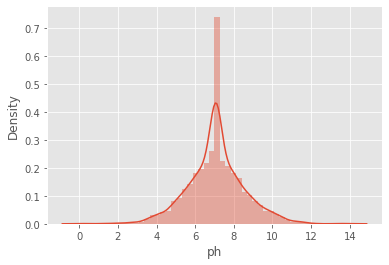

In [582]:
sns.distplot(df['ph'])
#plt.savefig("ph.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


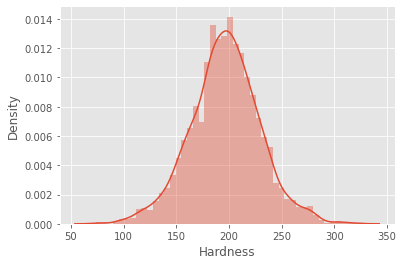

In [583]:
sns.distplot(df['Hardness'])
#plt.savefig("Hardness.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


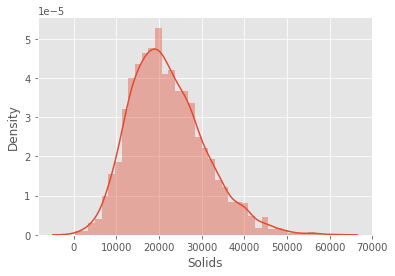

In [584]:
sns.distplot(df['Solids'])
#plt.savefig("Solids.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


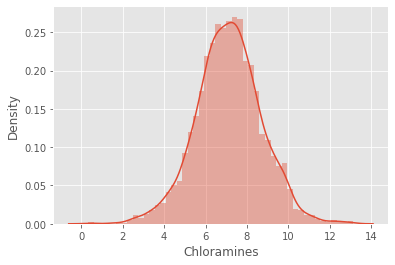

In [585]:
sns.distplot(df['Chloramines'])
#plt.savefig("Chloramines.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


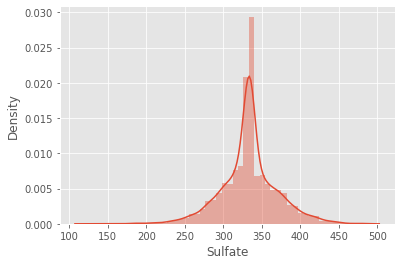

In [586]:
sns.distplot(df['Sulfate'])
#plt.savefig("Sulfate.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


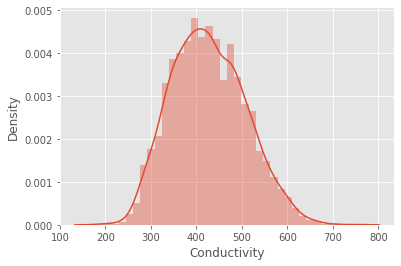

In [587]:
sns.distplot(df['Conductivity'])
#plt.savefig("Conductivity.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


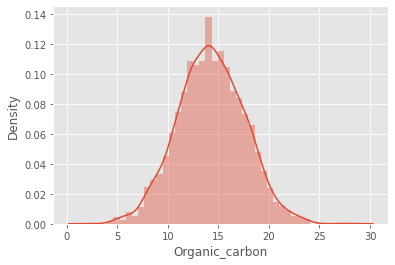

In [588]:
sns.distplot(df['Organic_carbon'])
#plt.savefig("Organic_carbon.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


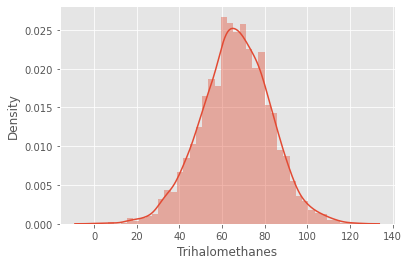

In [589]:
sns.distplot(df['Trihalomethanes'])
#plt.savefig("Trihalomethanes.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


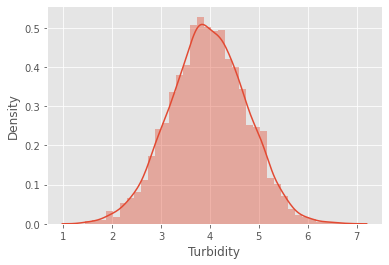

In [590]:
sns.distplot(df['Turbidity'])
#plt.savefig("Turbidity.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


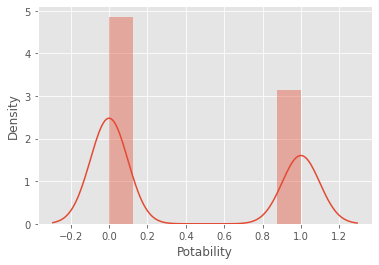

In [591]:
sns.distplot(df['Potability'])
#plt.savefig("Potability.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

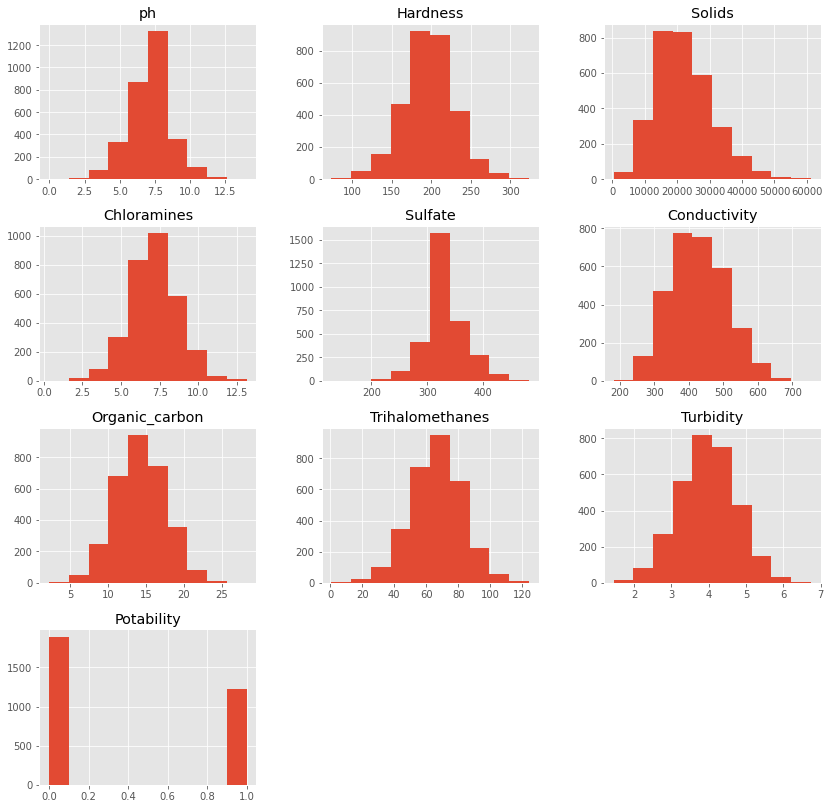

In [592]:
df.hist(figsize=(14,14))
plt.show()

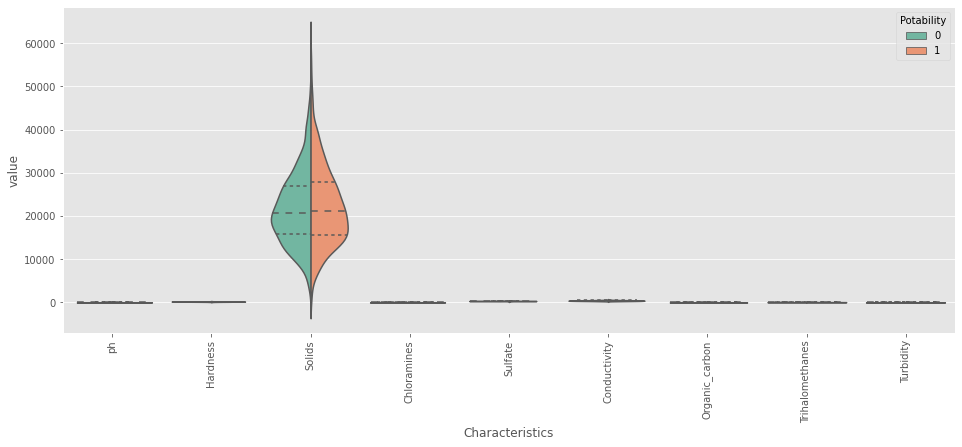

In [593]:
#Visualize biểu đồ Violin
# Biểu đồ violin dưới đây thể hiện sự phân bố của các đặc điểm phân loại. 
#Có thể thấy thuộc tính "Solids" của nước, có thể góp phần vào việc phân loại.
df_div = pd.melt(df, "Potability", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="Potability", split = True, data=df_div, inner = 'quartile', palette = 'Set2')
df_no_class = df.drop(["Potability"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
#plt.savefig("violinplot.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

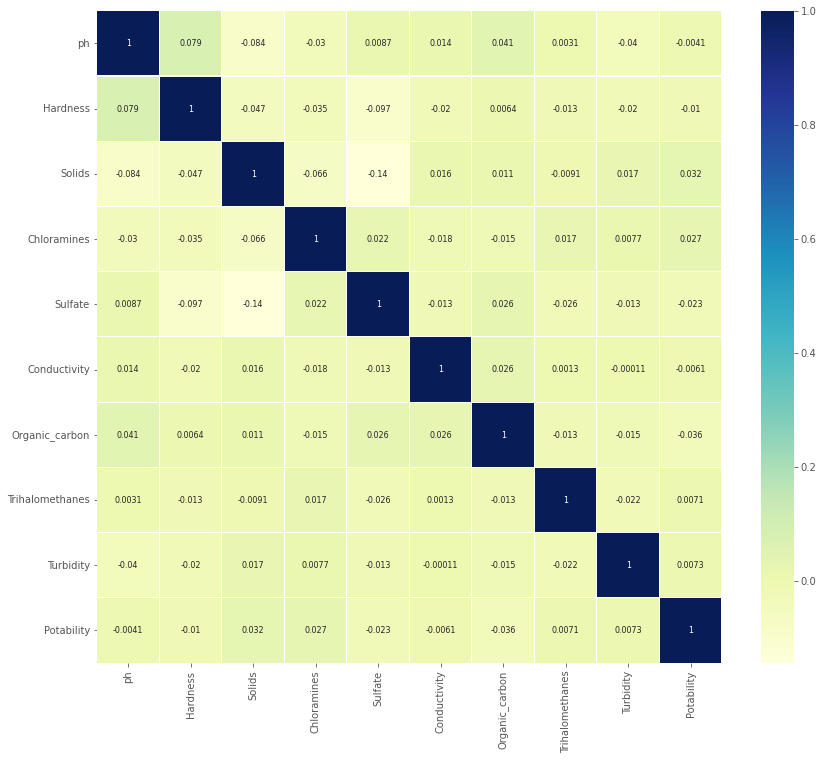

In [594]:
#Visualize biểu đồ thể hiện sự tương quan giữa các thuộc tính
#Nhận xét: Thông thường biến ít tương quan nhất là biến quan trọng nhất để phân loại. 
#Trong trường hợp này, "Solids" = -0,082. Vì vậy chúng ta hãy xem xét kỹ nó
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

In [595]:
Accuracy={}

In [596]:
X_dt = df.drop(['Potability'], axis=1)  
Y = df["Potability"]
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y, random_state=42, test_size=0.3) #train 70% - test 30%


# **CLASSIFICATION**

# **THUẬT TOÁN DECISION**

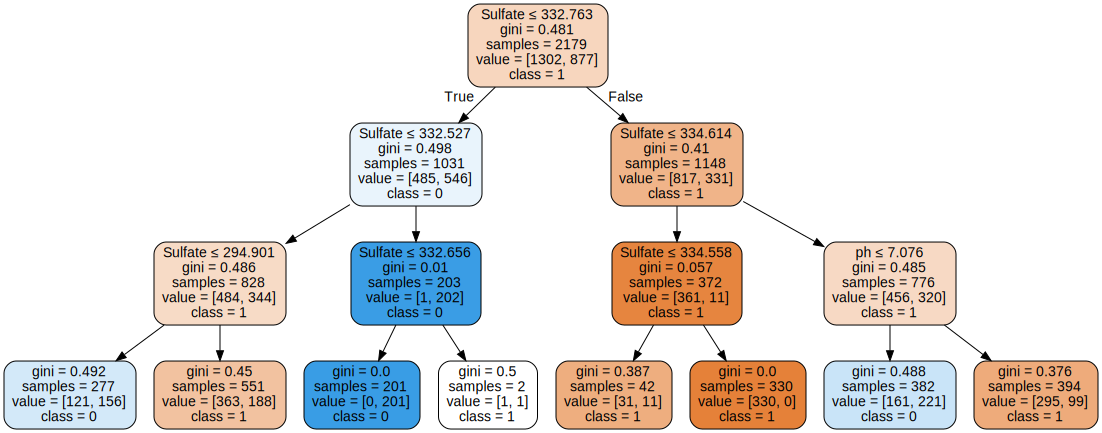

In [597]:
def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train_dt, Y_train_dt]
    test_data: [X_test_dt, Y_test_dt]
    """
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Evaluates the model using the testing data
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

from sklearn.tree import DecisionTreeClassifier as clf
Y_name = ['1','0']
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_dt, Y_train_dt)
Y_pred_dtc = clf.predict(X_test_dt)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_dt.columns,
                         class_names=Y_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(filename='DecisionTree')
graph


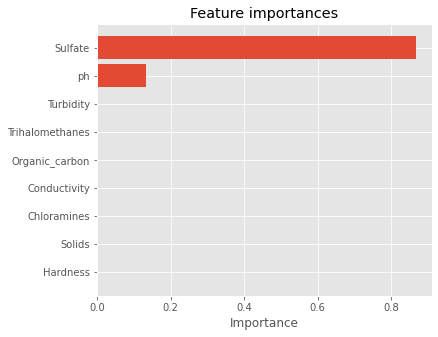

In [598]:
#Visualize biểu đồ thể hiện các đặc tính quan trọng trong bộ dữ liệu Water_Quality
features_list = X_dt.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(6,5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.savefig("featureimp.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

In [599]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train_dt,Y_train_dt)
Y_pred_dtc=clf.predict(X_test_dt)

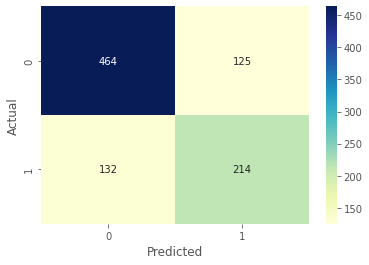

In [600]:
confusion_matrix = pd.crosstab(Y_test_dt, Y_pred_dtc, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
plt.savefig("rdfcm.png", format='png', dpi=150, bbox_inches='tight')

In [601]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(Y_test_dt, Y_pred_dtc)))
res = cross_val_score(clf, X_test_dt,Y_test_dt, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))

TEST RESULTS:

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       589
           1       0.63      0.62      0.62       346

    accuracy                           0.73       935
   macro avg       0.70      0.70      0.70       935
weighted avg       0.72      0.73      0.72       935


Average Accuracy:	0.6791

Standard Deviation:	0.0260



In [602]:
from sklearn import metrics
Accuracy_Decision_Tree=round((metrics.accuracy_score(Y_test_dt, Y_pred_dtc)*100),2)
print('Accuracy: ',Accuracy_Decision_Tree,"%")
Accuracy["tree"]=Accuracy_Decision_Tree

Accuracy:  72.51 %


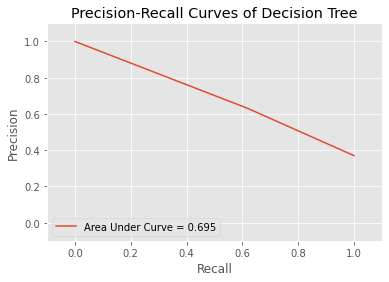

In [603]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
precision, recall, thresholds = precision_recall_curve(Y_test_dt, Y_pred_dtc)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.savefig("dtpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

# **THUẬT TOÁN RANDOM FOREST**

In [604]:
from sklearn.ensemble import RandomForestClassifier
rdf= RandomForestClassifier()
rdf.fit(X_train_dt,Y_train_dt)
Y_pred_rdf=rdf.predict(X_test_dt)

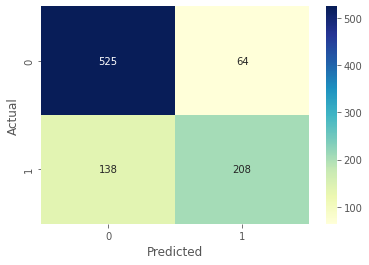

In [605]:
confusion_matrix = pd.crosstab(Y_test_dt, Y_pred_rdf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
#plt.savefig("rdfcm.png", format='png', dpi=150, bbox_inches='tight')

In [606]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
Accuracy_RandomForestClassifier=round((accuracy_score(Y_test_dt,Y_pred_rdf)*100),2)
print("Accuracy_RandomForestClassifier : ",Accuracy_RandomForestClassifier,"%")
Accuracy["RandomForestClassifier"]=Accuracy_RandomForestClassifier


Accuracy_RandomForestClassifier :  78.4 %


In [607]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Random Forest Classifier Report:\n\n{}\n'.format(classification_report(Y_test_dt, Y_pred_rdf)))
res = cross_val_score(rdf, X_test_dt,Y_test_dt, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))

TEST RESULTS:

Random Forest Classifier Report:

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       589
           1       0.76      0.60      0.67       346

    accuracy                           0.78       935
   macro avg       0.78      0.75      0.76       935
weighted avg       0.78      0.78      0.78       935


Average Accuracy:	0.7507

Standard Deviation:	0.0372



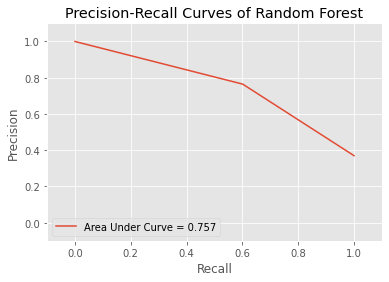

In [608]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
precision, recall, thresholds = precision_recall_curve(Y_test_dt, Y_pred_rdf)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("dtpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

In [609]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn import tree

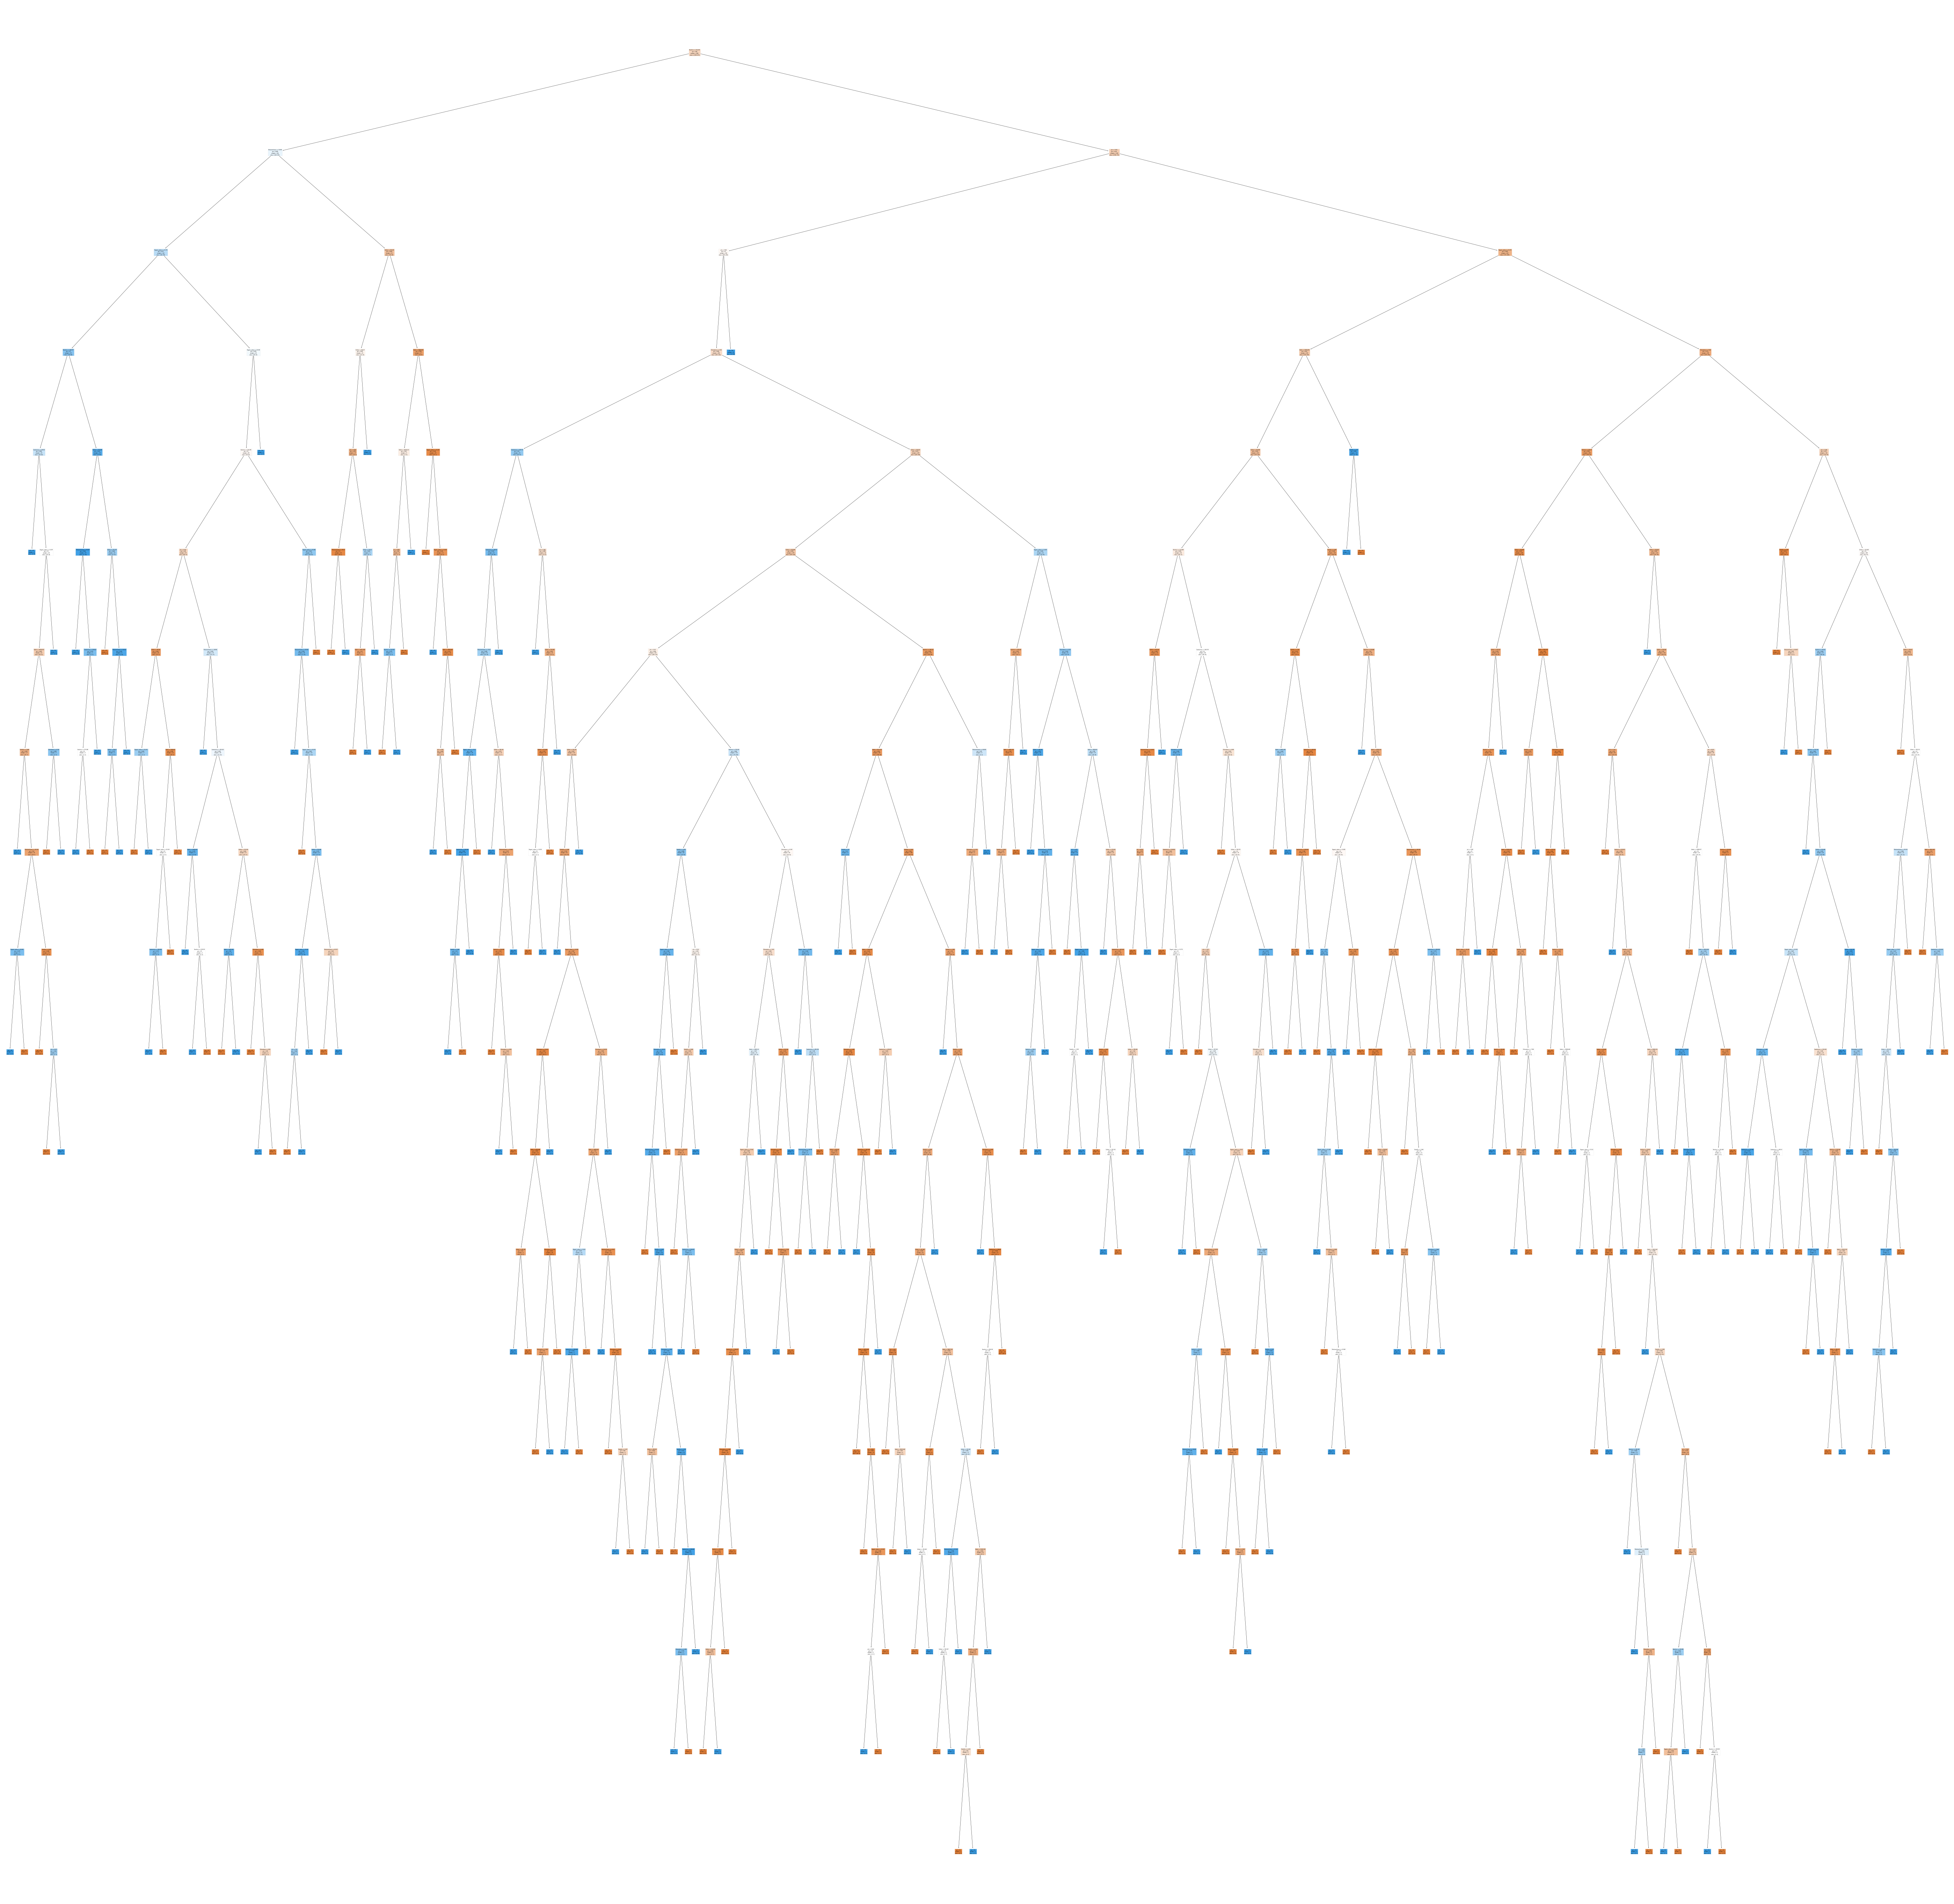

In [610]:
plt.figure(figsize=(100,100))
plt.title("Tree 1 Visualization")
_ = tree.plot_tree(rdf.estimators_[0], feature_names=X_dt.columns, filled=True)

# **THUẬT TOÁN SUPPOR VECTOR MACHINE**

In [611]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto", probability=True)
svm.fit(X_train_dt,Y_train_dt)

SVC(gamma='auto', probability=True, random_state=42)

In [612]:
Y_pred_svm = svm.predict(X_test_dt)

In [613]:
Accuracy_Svm=round((metrics.accuracy_score(Y_test_dt, Y_pred_svm)*100),2)
print('Accuracy: ',Accuracy_Svm,"%")
Accuracy["SVC"]=Accuracy_Svm

Accuracy:  62.99 %


In [614]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Random Forest Classifier Report:\n\n{}\n'.format(classification_report(Y_test_dt, Y_pred_svm)))
res = cross_val_score(svm, X_test_dt,Y_test_dt, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))

TEST RESULTS:

Random Forest Classifier Report:

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       589
           1       0.00      0.00      0.00       346

    accuracy                           0.63       935
   macro avg       0.31      0.50      0.39       935
weighted avg       0.40      0.63      0.49       935




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average Accuracy:	0.6300

Standard Deviation:	0.0038



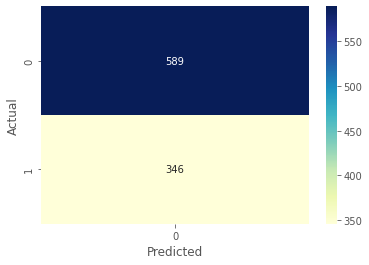

In [615]:
confusion_matrix = pd.crosstab(Y_test_dt, Y_pred_svm, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
plt.savefig("svmcm.png", format='png', dpi=150, bbox_inches='tight')

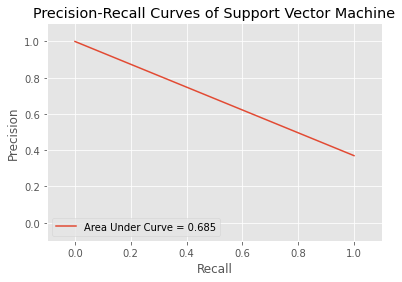

In [616]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
precision, recall, thresholds = precision_recall_curve(Y_test_dt, Y_pred_svm)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Support Vector Machine')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.savefig("dtpr5.png", format='png', dpi=150, bbox_inches='tight')


# **CLUSTERING**

In [617]:
# Chọn thuộc tính quan trọng để phân cụm
features = ["Solids","Sulfate","Potability"]
df2 = df.dropna(subset=features)
data = df2[features].copy()
data

,Solids,Sulfate,Potability
0,20791.31898,368.516441,0
1,18630.05786,334.564290,0
2,19909.54173,334.564290,0
3,22018.41744,356.886136,0
4,17978.98634,310.135738,0
...,...,...,...
3270,26138.78019,345.700257,1
3271,47580.99160,359.948574,1
3273,33155.57822,332.566990,1
3274,11983.86938,332.566990,1


In [618]:
data_clus_dt = data.drop(['Potability'], axis=1)
Y_clus = data["Potability"]
X_train_clus_dt, X_test_clus_dt, Y_train_clus_dt, Y_test_clus_dt = train_test_split(data_clus_dt, Y_clus, random_state=42, test_size=0.3) #train 70% - test 30%
# data_clus_dt

# ***THUẬT TOÁN K-MEANS***
# Bước 1. Scaled
# Bước 2. Khởi tạo tâm cụm ngẫu nhiên
# Bước 3. Dãn nhãn cho mỗi điểm dữ liệu
# Bước 4. Cập nhật tâm cụm
# Bước 5. Lập bước 3 và 4 cho đến khi tâm cụm không thay đổi



In [619]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

losses = []
K = 10
for i in range(1, K):
  # 1.  Huấn luyện với số cụm = i
  kmeans_i = KMeans(n_clusters=i, random_state=0)
  kmeans_i.fit(data_clus_dt)
  # 2. Tính _hàm biến dạng_
  # 2.1. Khoảng cách tới toàn bộ centroids
  d2centroids = cdist(data_clus_dt, kmeans_i.cluster_centers_, 'euclidean') # shape (n, k)
  # 2.2. Khoảng cách tới centroid gần nhất
  min_distance = np.min(d2centroids, axis=1) # shape (n)
  loss = np.sum(min_distance)
  losses.append(loss)

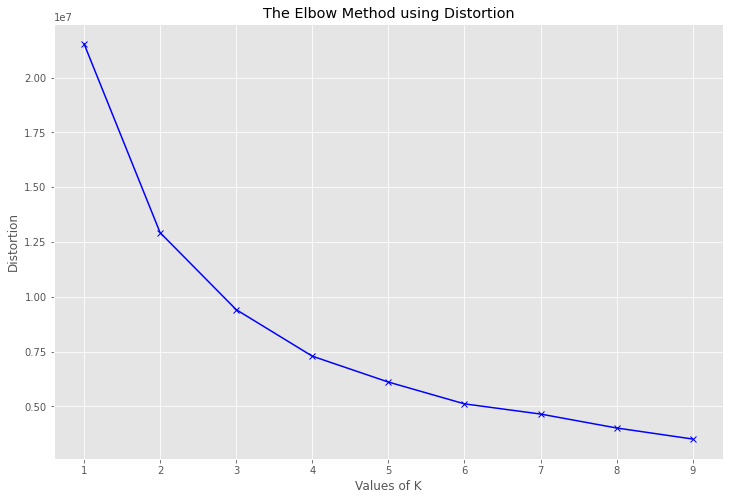

In [620]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, K), losses, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [621]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(data_clus_dt)

In [622]:
data_clus_dt.describe()

,Solids,Sulfate
count,3114.000000,3114.000000
mean,21965.123666,333.682521
std,8729.800382,36.160037
min,320.942611,129.000000
25%,15682.104815,316.844848
50%,20890.593525,334.564290
75%,27198.150053,350.367920
max,61227.196010,481.030642


In [623]:
# Bước 2: Khởi tạo tâm cụm ngẫu nhiên
import pandas as pd
import numpy as np
def random_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid  = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [624]:
centroids = random_centroids(data_clus_dt, 2)
centroids

,0,1
Solids,50166.533320,21708.949290
Sulfate,337.350529,370.294867


In [625]:
# Bước 2: Dãn nhán cho mỗi điểm dữ liệu
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
  return distances.idxmin(axis=1)
labels = get_labels(data, centroids)
labels.value_counts()

1    2901
0     213
dtype: int64

In [626]:
#Bước 3. Cập nhật tâm cụm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
def plotcluster(data, labels, centroids, iteration):
  pca = PCA(n_components=3)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

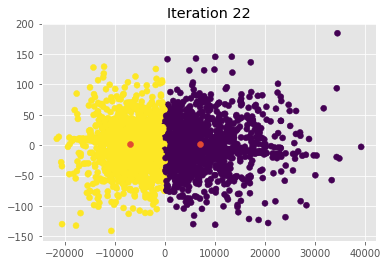

In [627]:
# Bước 4. Lập bước 2 và 3 cho đến khi tâm cụm không thay đổi
from sklearn.impute import SimpleImputer
max_iterations = 100
k=2
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids
  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plotcluster(data, labels, centroids, iteration)
  iteration += 1

In [628]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, init="k-means++")
kmeans.fit(data_clus_dt)

#Y_pred_km=kmeans.predict(X_test_clus_dt)
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [629]:
# Đánh giá độ phân cụm của thuật toán K_Means bằng DAVIES BOULDIN
from sklearn import metrics
Accuracy_KMeans=round((metrics.davies_bouldin_score(data_clus_dt, kmeans.labels_ )*1.00),2)
print('Accuracy: ',Accuracy_KMeans)
Accuracy["KMeans"]=Accuracy_KMeans

Accuracy:  0.59


# **THUẬT TOÁN DBSCAN**

In [630]:
#X_dbdf= df.loc[:, ['Sulfate','Solids']].values

In [631]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit là phương thức xây dựng
#fit_transform xây dựng và chuyển đổi
scaled_X = scaler.fit_transform(data_clus_dt)
scaled_X

array([[-0.13448111,  0.96348118],
       [-0.38209367,  0.0243891 ],
       [-0.23550505,  0.0243891 ],
       ...,
       [ 1.28207419, -0.03085476],
       [-1.14353787, -0.03085476],
       [-0.52254106, -0.03085476]])

In [632]:
from sklearn.cluster import DBSCAN
number_of_outliers =[]
percentage_of_outliers =[]

min_samples = 2 * scaled_X.shape[1]

for eps in np.linspace(0.001, 3, 50):
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  dbscan.fit(scaled_X)

  number_of_outliers.append(np.sum(dbscan.labels_== -1))
 

  perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
  percentage_of_outliers.append(perc_outliers)
  # a=(dbscan.labels_==1)  TÌM THUỘC TÍNH LABELS (DỮ LIỆU NHIỄU) SO SÁNH NÓ CÓ BẰNG TRỪ 1 HAY K NẾU CÓ SẼ TÍNH TỔNG NÓ VÀ THÊM VÀO MẢNG
  # print("a",a)
  # x=np.sum(dbscan.labels_)
  # print("x",x)
  # y=len(dbscan.labels_) 3114 LÀ ĐỘ DÀI CỦA CÁC HÀNG
  # print("y",y)
  # print("z=",percentage_of_outliers)

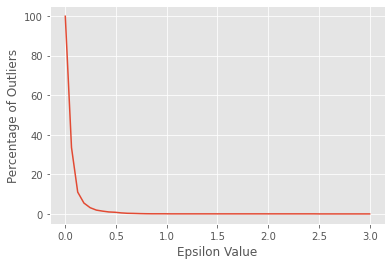

In [633]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=percentage_of_outliers);

plt.xlabel("Epsilon Value")
plt.ylabel("Percentage of Outliers");

In [634]:
from sklearn.cluster import DBSCAN
min_samples= 2* scaled_X.shape[1]
dbscan = DBSCAN(eps=0.5, min_samples= min_samples)
dbscan.fit(scaled_X)


DBSCAN(min_samples=4)

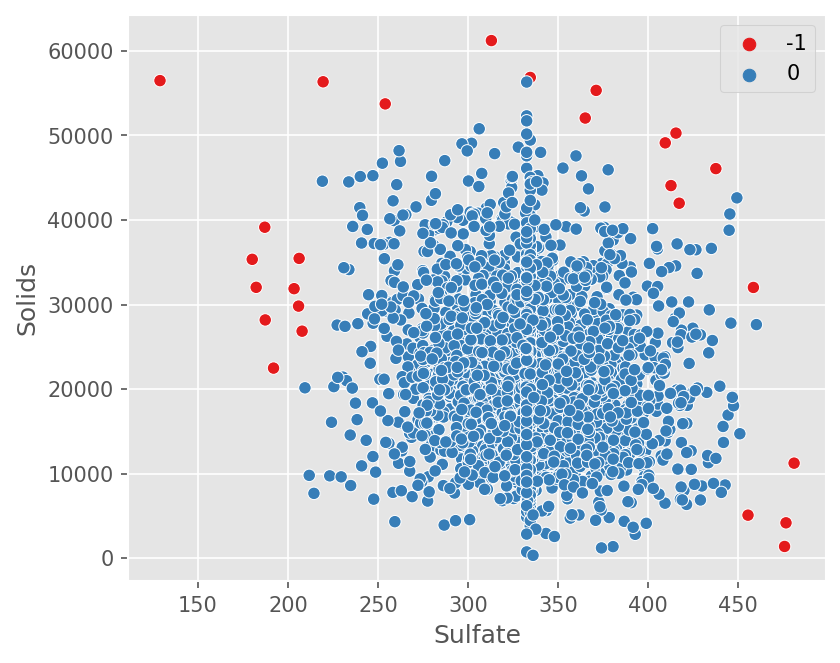

In [635]:
plt.figure(figsize=(6,5), dpi=150)
sns.scatterplot(data=data_clus_dt,x='Sulfate',y='Solids',hue=dbscan.labels_,palette='Set1')
#plt.savefig("db.png", format='png', dpi=100, bbox_inches='tight')

In [636]:
from sklearn.cluster import DBSCAN
min_samples= 2* scaled_X.shape[1]
dbscan = DBSCAN(eps=0.5, min_samples= min_samples).fit(scaled_X)
dbscan.labels_
#Y_pred_db=dbscan.fit_predict(X_test_clus_dt)

array([0, 0, 0, ..., 0, 0, 0])

In [637]:
from sklearn import metrics
Accuracy_DBscan=round((metrics.davies_bouldin_score(data_clus_dt, dbscan.labels_ )*1.00),2)
print('Accuracy: ',Accuracy_DBscan)
Accuracy["KMeans"]=Accuracy_DBscan

Accuracy:  1.39


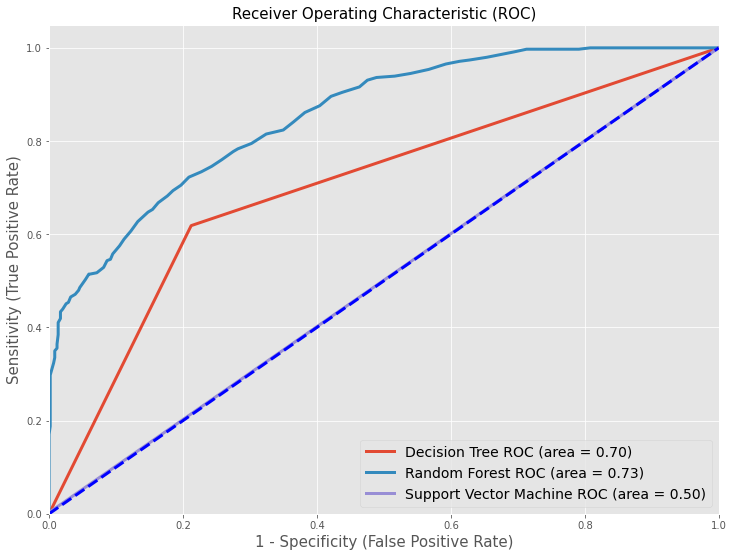

In [638]:
#Visualize mô hình ROC (Receiver Operating Characteristic) Curves - so sánh trực quan các mô hình phân loại
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

plt.figure(figsize=(12,9))
models = [
{
    'label': 'Decision Tree',
    'model': clf,
},
{
    'label': 'Random Forest',
    'model': rdf,
},
{
    'label': 'Support Vector Machine',
    'model': svm,
}
]

for m in models:
    model = m['model'] 
    model.fit(X_train_dt, Y_train_dt) 
    y_pred=model.predict(X_test_dt) 
    fpr, tpr, thresholds = roc_curve(Y_test_dt, model.predict_proba(X_test_dt)[:,1])
    auc = roc_auc_score(Y_test_dt,model.predict(X_test_dt))
    plt.plot(fpr, tpr, linestyle='-', linewidth=3, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'b--', linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=14)
#plt.savefig("roc_curves.png", format='png', dpi=100, bbox_inches='tight')
plt.show()